In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score,precision_score,accuracy_score,classification_report,confusion_matrix,f1_score
import warnings
warnings.filterwarnings('ignore')

In [65]:
data=pd.read_csv("startup_data.csv")
data.head(5)

,Startup Name,Industry,Funding Rounds,Funding Amount (M USD),Valuation (M USD),Revenue (M USD),Employees,Market Share (%),Profitable,Year Founded,Region,Exit Status
0,Startup_1,IoT,1,101.09,844.75,67.87,1468,5.20,0,2006,Europe,Private
1,Startup_2,EdTech,1,247.62,3310.83,75.65,3280,8.10,1,2003,South America,Private
2,Startup_3,EdTech,1,109.24,1059.37,84.21,4933,2.61,1,1995,South America,Private
3,Startup_4,Gaming,5,10.75,101.90,47.08,1059,2.53,0,2003,South America,Private
4,Startup_5,IoT,4,249.28,850.11,50.25,1905,4.09,0,1997,Europe,Acquired


In [66]:
data=data.drop("Startup Name",axis=1)

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Industry                500 non-null    object 
 1   Funding Rounds          500 non-null    int64  
 2   Funding Amount (M USD)  500 non-null    float64
 3   Valuation (M USD)       500 non-null    float64
 4   Revenue (M USD)         500 non-null    float64
 5   Employees               500 non-null    int64  
 6   Market Share (%)        500 non-null    float64
 7   Profitable              500 non-null    int64  
 8   Year Founded            500 non-null    int64  
 9   Region                  500 non-null    object 
 10  Exit Status             500 non-null    object 
dtypes: float64(4), int64(4), object(3)
memory usage: 43.1+ KB


In [68]:
data.isnull().sum()

Industry                  0
Funding Rounds            0
Funding Amount (M USD)    0
Valuation (M USD)         0
Revenue (M USD)           0
Employees                 0
Market Share (%)          0
Profitable                0
Year Founded              0
Region                    0
Exit Status               0
dtype: int64

In [69]:
data.duplicated().sum()

0

In [70]:
data.describe()

,Funding Rounds,Funding Amount (M USD),Valuation (M USD),Revenue (M USD),Employees,Market Share (%),Profitable,Year Founded
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,2.958000,152.656760,1371.809180,49.321740,2532.092000,5.092940,0.432000,2006.044000
std,1.440968,86.683711,978.226579,29.267605,1385.434921,2.807646,0.495851,9.347128
min,1.000000,0.570000,2.430000,0.120000,12.000000,0.100000,0.000000,1990.000000
25%,2.000000,79.212500,557.027500,22.802500,1382.750000,2.760000,0.000000,1998.000000
50%,3.000000,156.005000,1222.580000,48.800000,2496.500000,5.135000,0.000000,2006.000000
75%,4.000000,226.450000,2052.085000,74.965000,3708.750000,7.552500,1.000000,2014.000000
max,5.000000,299.810000,4357.490000,99.710000,4984.000000,10.000000,1.000000,2022.000000


# EDA

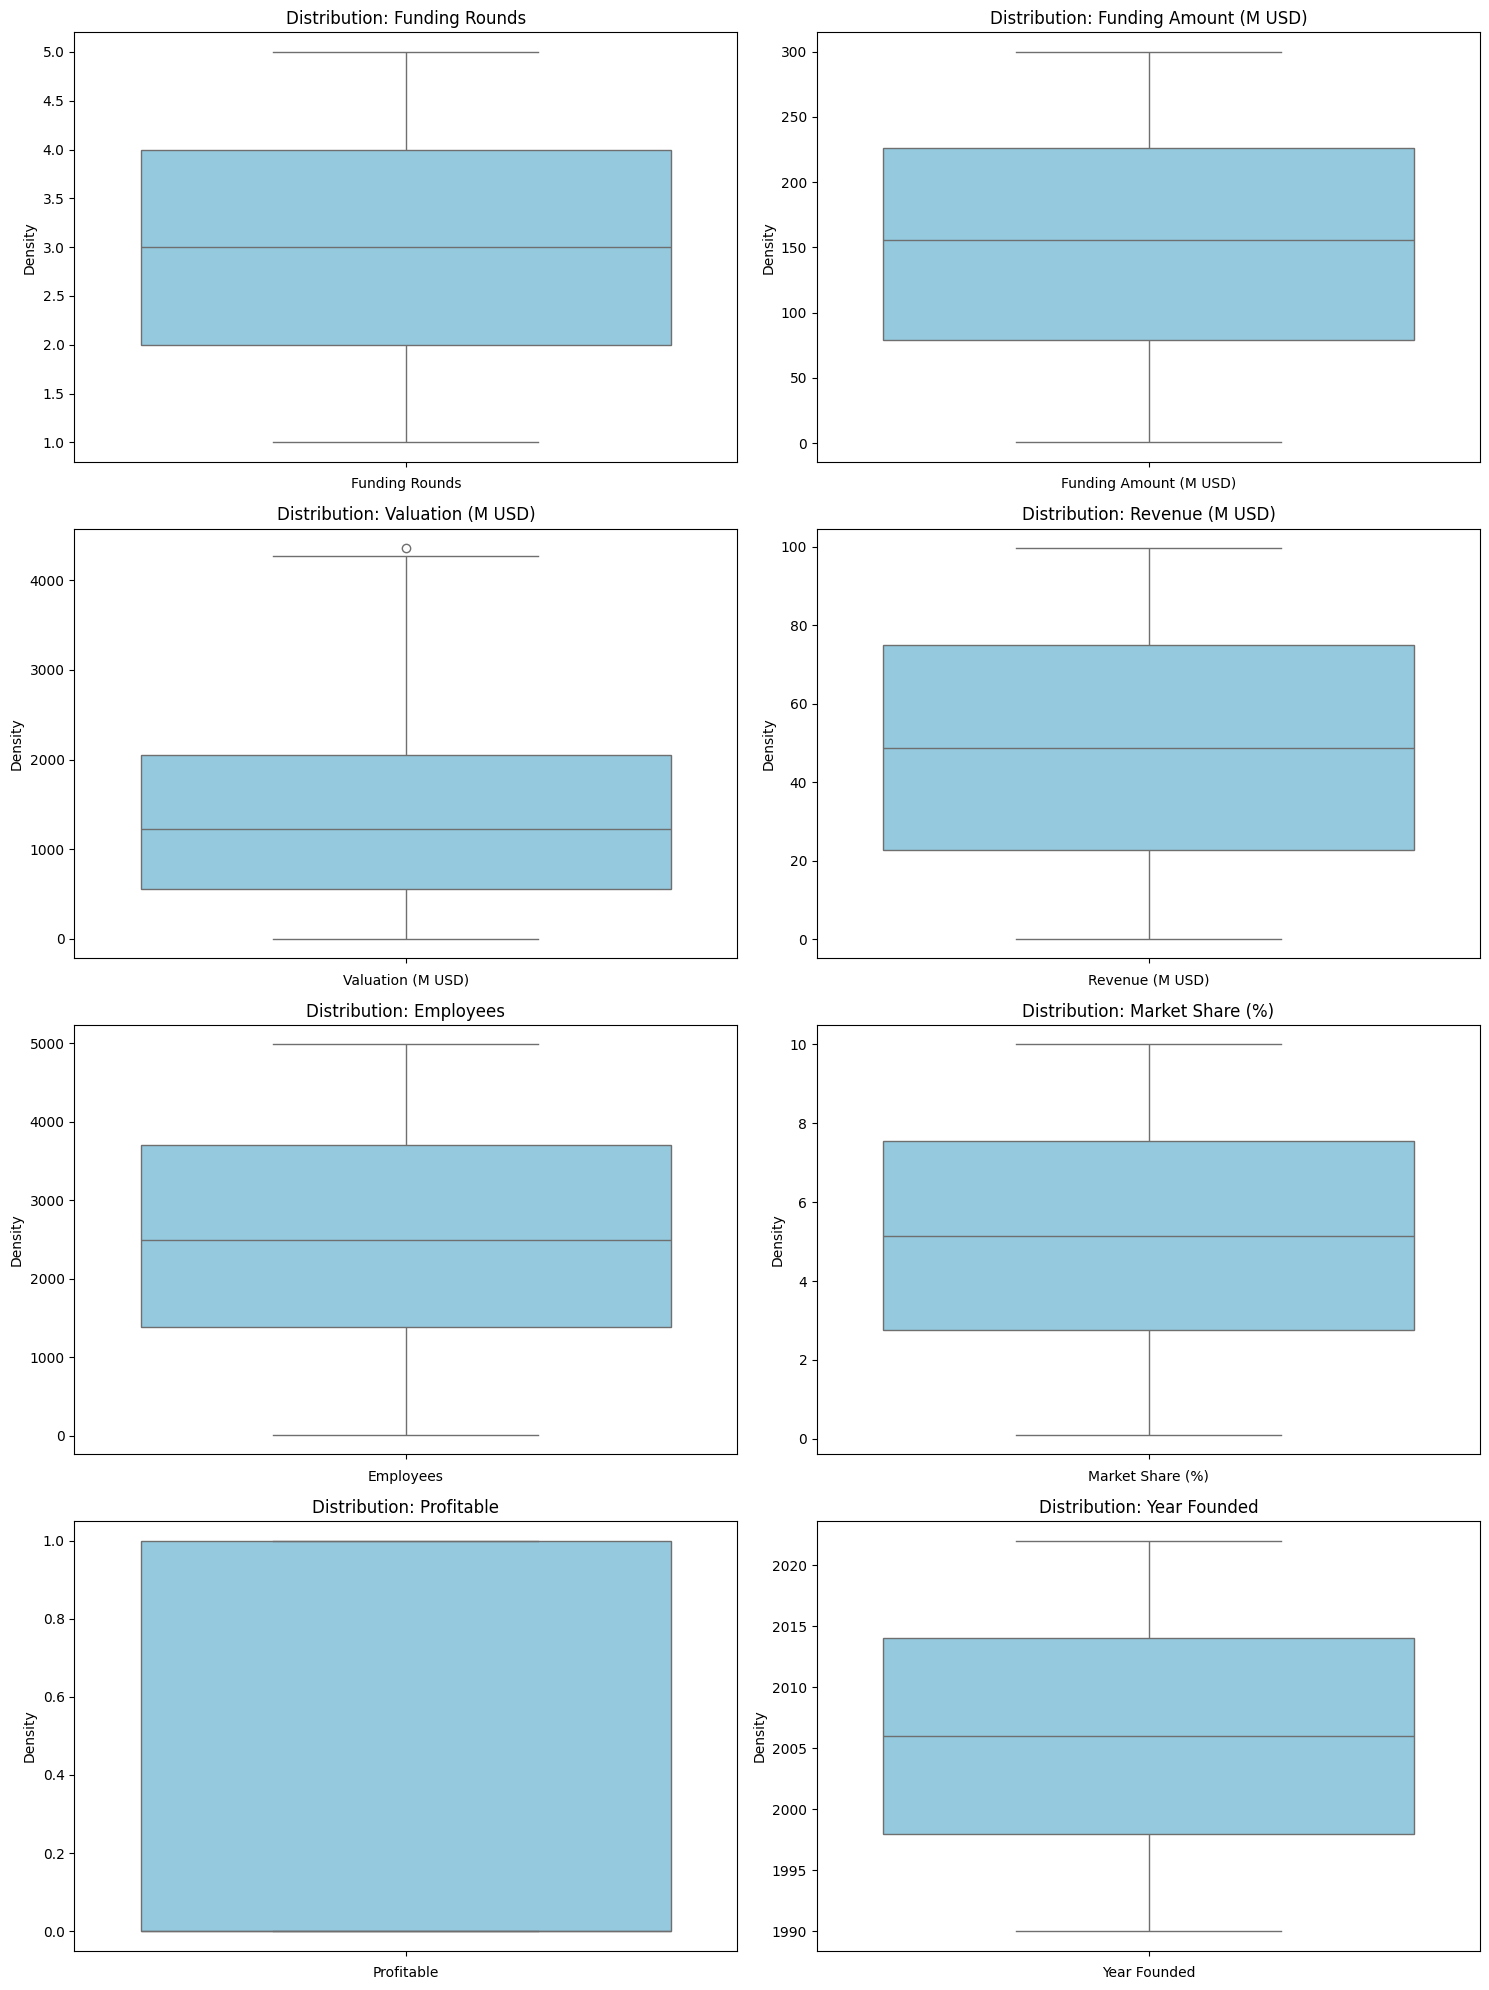

In [71]:
numeric_cols = data.select_dtypes(include=[np.number]).columns
num_cols = 2
num_rows = (len(numeric_cols) + num_cols - 1) // num_cols 
plt.figure(figsize=(15, num_rows * 5))

for i, column in enumerate(numeric_cols, 1):
    plt.subplot(num_rows, num_cols, i) 
    sns.boxplot(data[column], color='skyblue')
    plt.title(f"Distribution: {column}")
    plt.xlabel(column)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

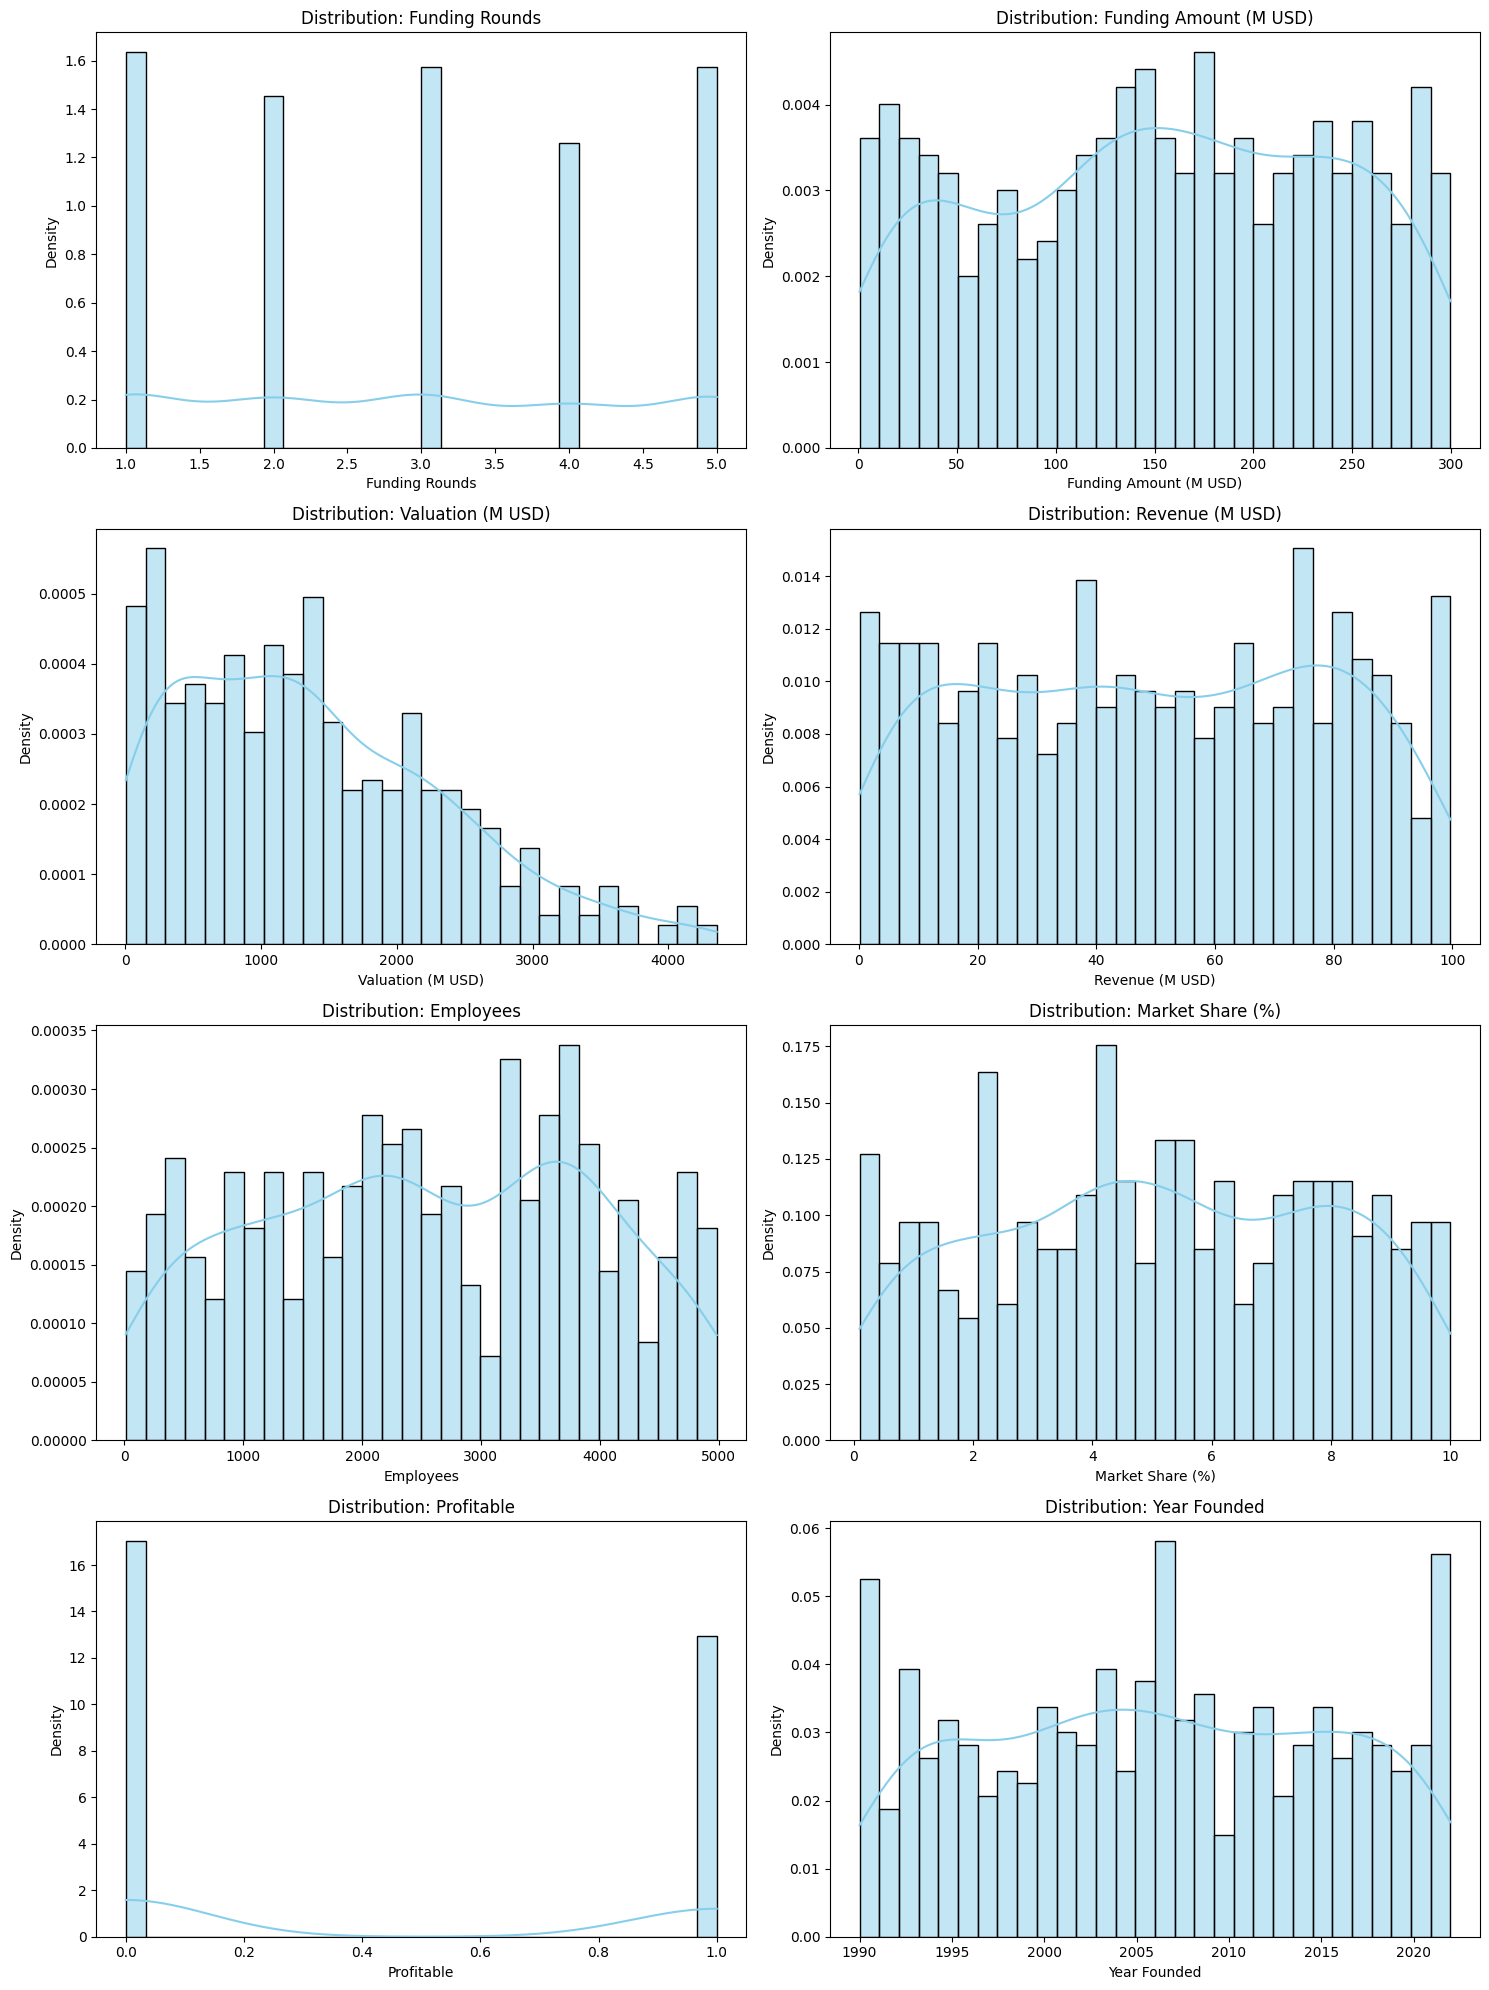

In [72]:
numeric_cols = data.select_dtypes(include=[np.number]).columns
num_cols = 2
num_rows = (len(numeric_cols) + num_cols - 1) // num_cols 
plt.figure(figsize=(15, num_rows * 5))

for i, column in enumerate(numeric_cols, 1):
    plt.subplot(num_rows, num_cols, i) 
    sns.histplot(data[column], kde=True, stat='density', color='skyblue', bins=30)
    plt.title(f"Distribution: {column}")
    plt.xlabel(column)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

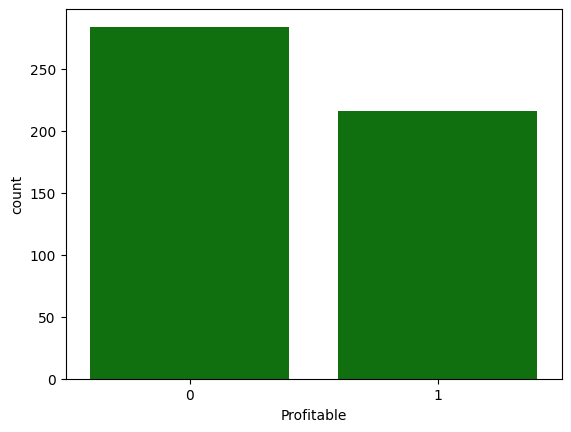

In [73]:
sns.countplot(x="Profitable",data=data,color="green")
plt.show()

# Feature Engineering

In [75]:
le=LabelEncoder()
data["Industry"]=le.fit_transform(data["Industry"])
data["Region"]=le.fit_transform(data["Region"])
data["Exit Status"]=le.fit_transform(data["Exit Status"])

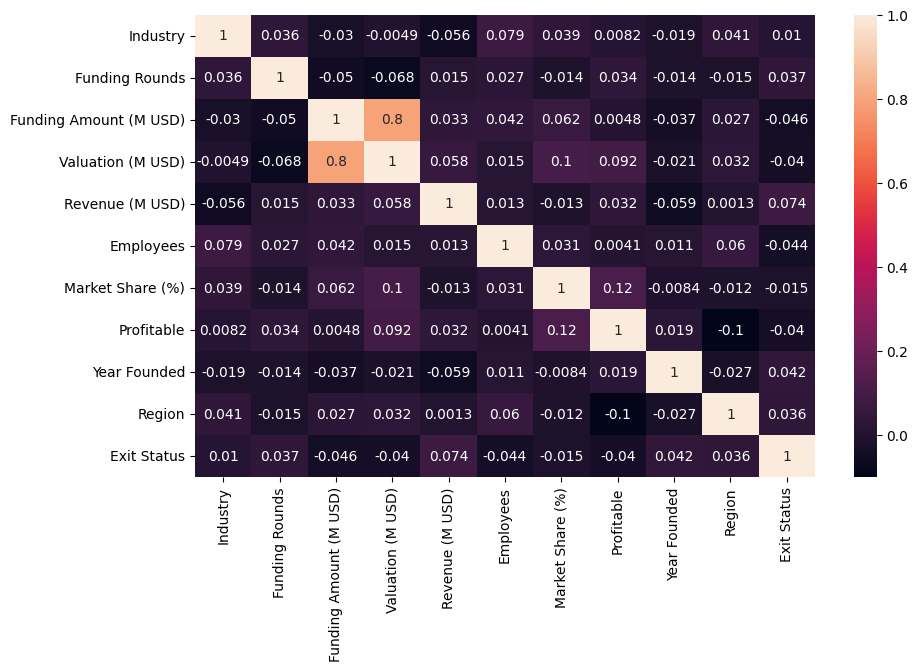

In [76]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [77]:
x=data.drop(["Profitable"],axis=1)
y=data["Profitable"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

# Classifiers

In [80]:
models={
    "Random Forest Classifier":RandomForestClassifier(),
    "Decision Tree Classifier":DecisionTreeClassifier(),
    "Ada Boost Classifier":AdaBoostClassifier(),
    "KNN":KNeighborsClassifier(),
    "Gradient Boosting Classifier":GradientBoostingClassifier(),
    "Logistic Regression":LogisticRegression()
}

In [81]:
metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall':[]
}
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")  
    recall = recall_score(y_test, y_pred, average="weighted")
    precision = precision_score(y_test, y_pred, average="weighted")
    metrics['Model'].append(name)
    metrics['Accuracy'].append(acc * 100)
    metrics['Precision'].append(precision * 100)
    metrics['Recall'].append(recall * 100)
    print(f"Model: {name}")
    print(f"Accuracy: {acc*100}")
    print(f"Precision: {precision*100}")
    print(f"F1 Score: {f1*100}")
    print(f"Recall: {recall*100}")
    print("-" * 30)

Model: Random Forest Classifier
Accuracy: 49.6
Precision: 48.38181818181818
F1 Score: 48.74420861127956
Recall: 49.6
------------------------------
Model: Decision Tree Classifier
Accuracy: 53.6
Precision: 53.6
F1 Score: 53.6
Recall: 53.6
------------------------------
Model: Ada Boost Classifier
Accuracy: 54.400000000000006
Precision: 53.62487616951017
F1 Score: 53.84483243026289
Recall: 54.400000000000006
------------------------------
Model: KNN
Accuracy: 57.599999999999994
Precision: 56.43764705882353
F1 Score: 56.39197315252379
Recall: 57.599999999999994
------------------------------
Model: Gradient Boosting Classifier
Accuracy: 59.199999999999996
Precision: 58.175294117647056
F1 Score: 58.037559071296485
Recall: 59.199999999999996
------------------------------
Model: Logistic Regression
Accuracy: 55.2
Precision: 53.727370304114494
F1 Score: 53.77611447440835
Recall: 55.2
------------------------------


# Results

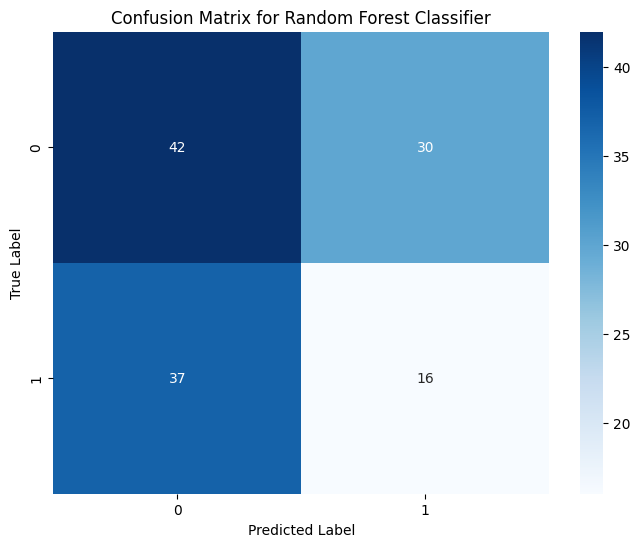

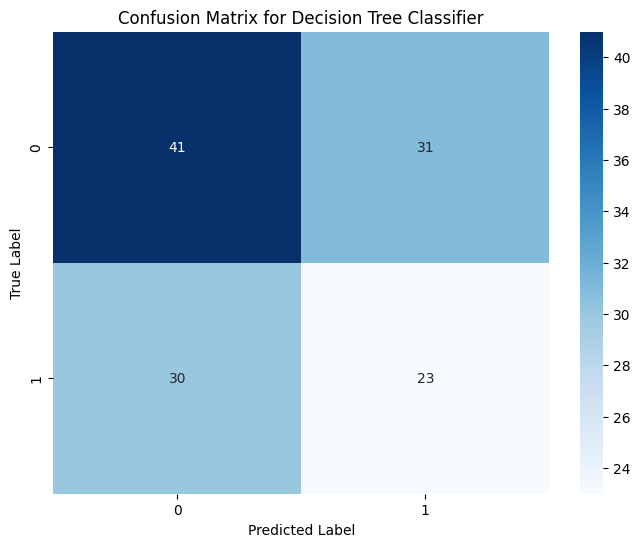

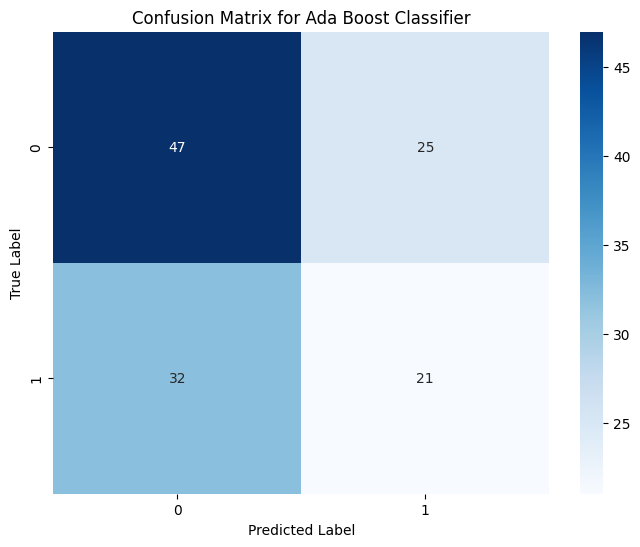

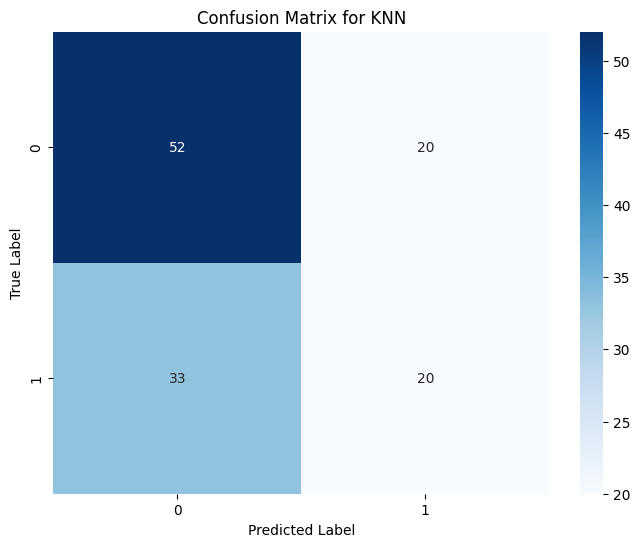

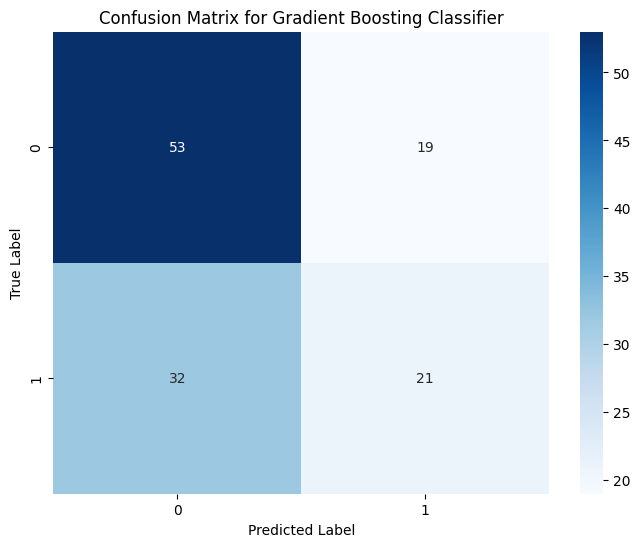

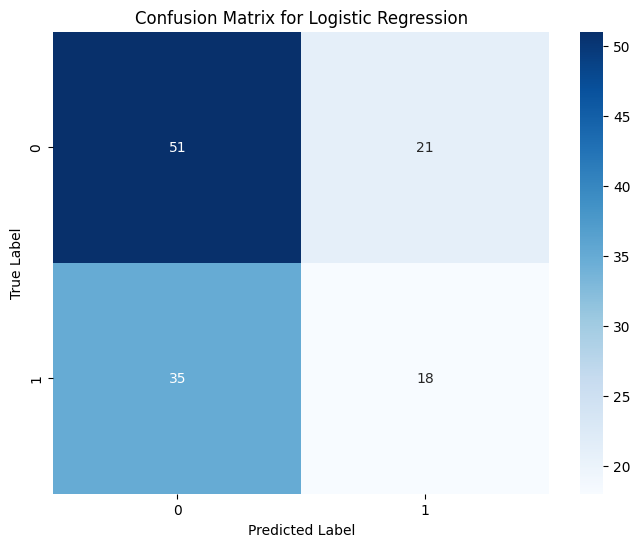

In [82]:
accuracy_results={}
for name,clf in models.items():
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    accuracy_results[name]=accuracy
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

<Figure size 1400x600 with 0 Axes>

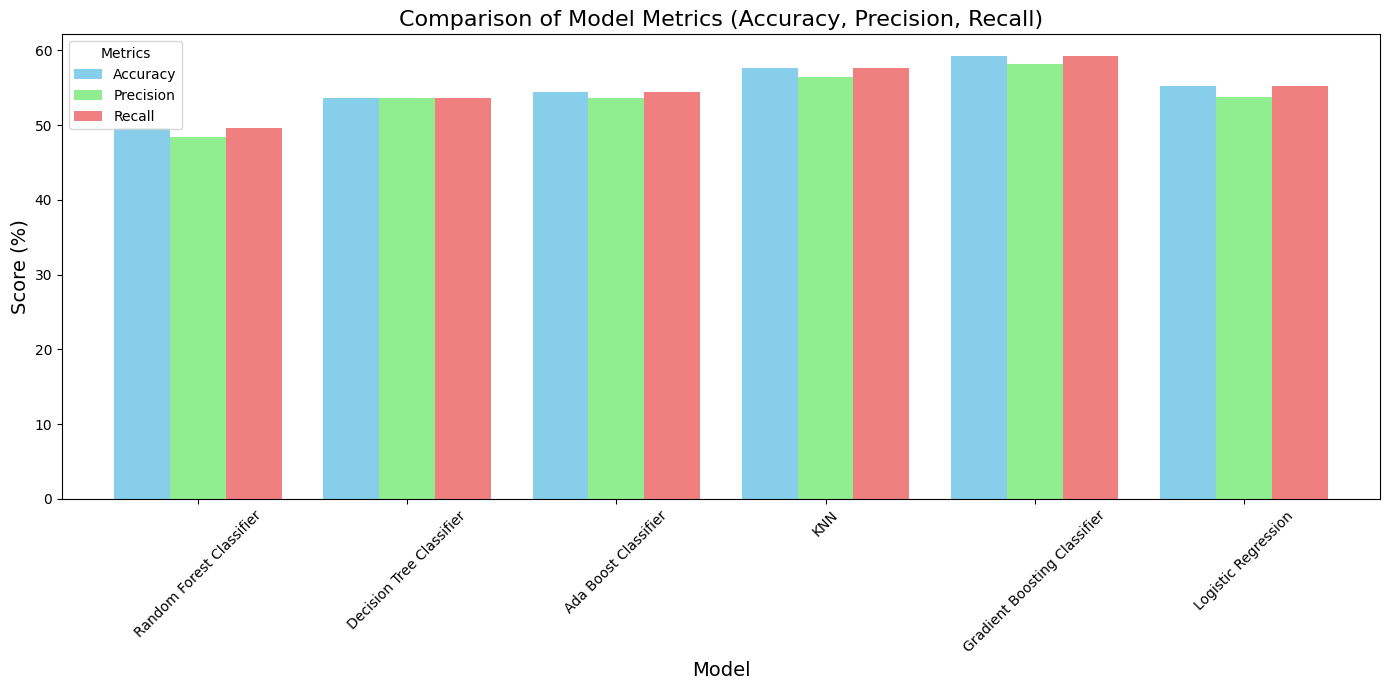

In [83]:
metrics_df = pd.DataFrame(metrics)
plt.figure(figsize=(14, 6))
metrics_df.set_index('Model').plot(kind='bar', width=0.8, figsize=(14, 7), color=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Comparison of Model Metrics (Accuracy, Precision, Recall)', fontsize=16)
plt.ylabel('Score (%)', fontsize=14)
plt.xlabel('Model', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Metrics', loc='upper left')
plt.tight_layout()
plt.show()